In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\simple linear regression\\Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Data visualisation

<AxesSubplot:xlabel='Salary', ylabel='Density'>

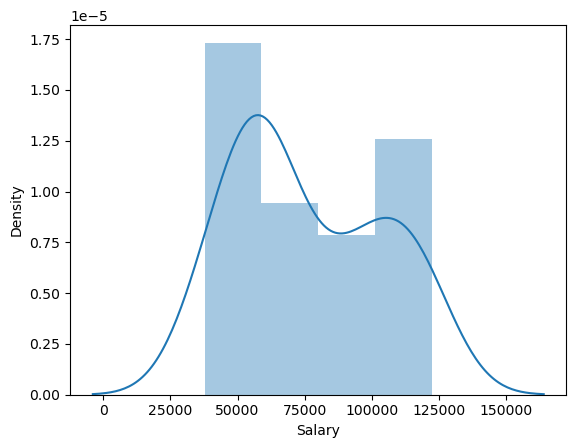

In [4]:
import seaborn as sns
sns.distplot(data['Salary'],kde=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

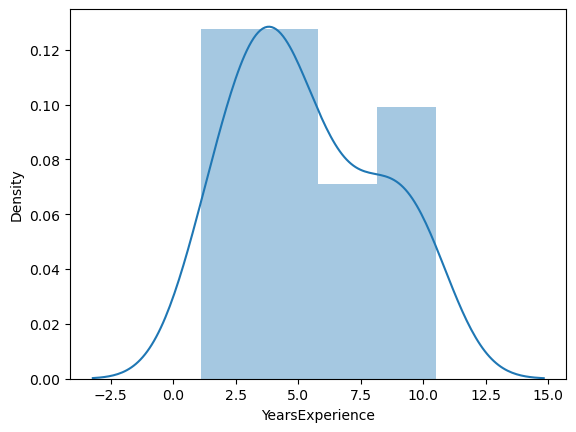

In [5]:
sns.distplot(data['YearsExperience'],kde=True)

In [6]:
#no need of EDA and Feature engineering as there are no null values as well as unwanted columns

# Correlation

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


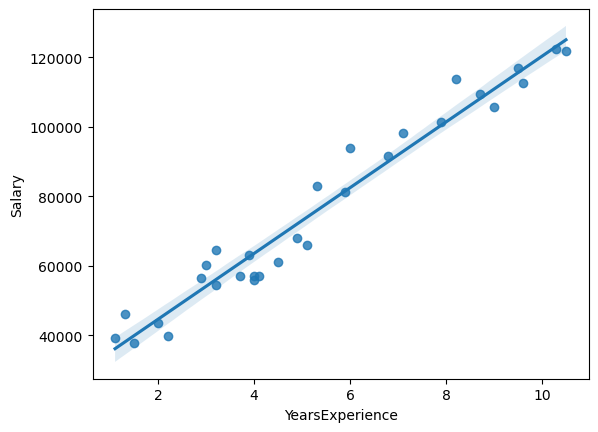

In [8]:
sns.regplot(x='YearsExperience',y='Salary',data=data);

# Fitting linear regression model

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        19:51:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since we got good Rsquared value of 95.7% we consider it as our final model. even after doing some transformations we could'nt get better Rsquared value than initial model.Hence i dropped those models.

In [20]:
FINAL_MODEL=smf.ols("Salary~YearsExperience",data=data).fit()
FINAL_MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        19:58:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#finding coefficient parameters
FINAL_MODEL.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#finding tvalues and pvalues
FINAL_MODEL.tvalues , FINAL_MODEL.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [23]:
#finding rsquared values.
FINAL_MODEL.rsquared , FINAL_MODEL.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predicting from final model

In [24]:
#manual predicting
salaryhike=(25792.200199)+(9449.962321)*(3.1)
salaryhike

55087.0833941

In [25]:
#automatic prediction of salary hike for say years of experience of 3.1 & 2.7
new_data=pd.Series([2.7,3.1])
new_data

0    2.7
1    3.1
dtype: float64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2.7
1,3.1


In [28]:
#now prediction from the above model we created
FINAL_MODEL.predict(data_pred)

0    51307.098467
1    55087.083395
dtype: float64